In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [9]:
df = df.drop(['CustomerID'], axis = 1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [13]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0


In [16]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

In [22]:
model = DecisionTreeClassifier(criterion='entropy')  # Using entropy for ID3
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9987573137265054


In [28]:
print(export_text(model, feature_names=list(X.columns)))

|--- Payment Delay <= 15.50
|   |--- Usage Frequency <= 5.50
|   |   |--- Age <= 50.50
|   |   |   |--- Usage Frequency <= 2.50
|   |   |   |   |--- Contract Length <= 0.50
|   |   |   |   |   |--- Total Spend <= 301.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Total Spend >  301.50
|   |   |   |   |   |   |--- Tenure <= 11.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Tenure >  11.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Contract Length >  0.50
|   |   |   |   |   |--- Tenure <= 5.50
|   |   |   |   |   |   |--- Subscription Type <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Subscription Type >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Tenure >  5.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Usage Frequency >  2.50
|   |   |   |   |--- Tenure <= 5.50
|   |   |   |   |   |--- Subscription Type <= 0.50
|   |   |   |   |   |   |--- Usage F

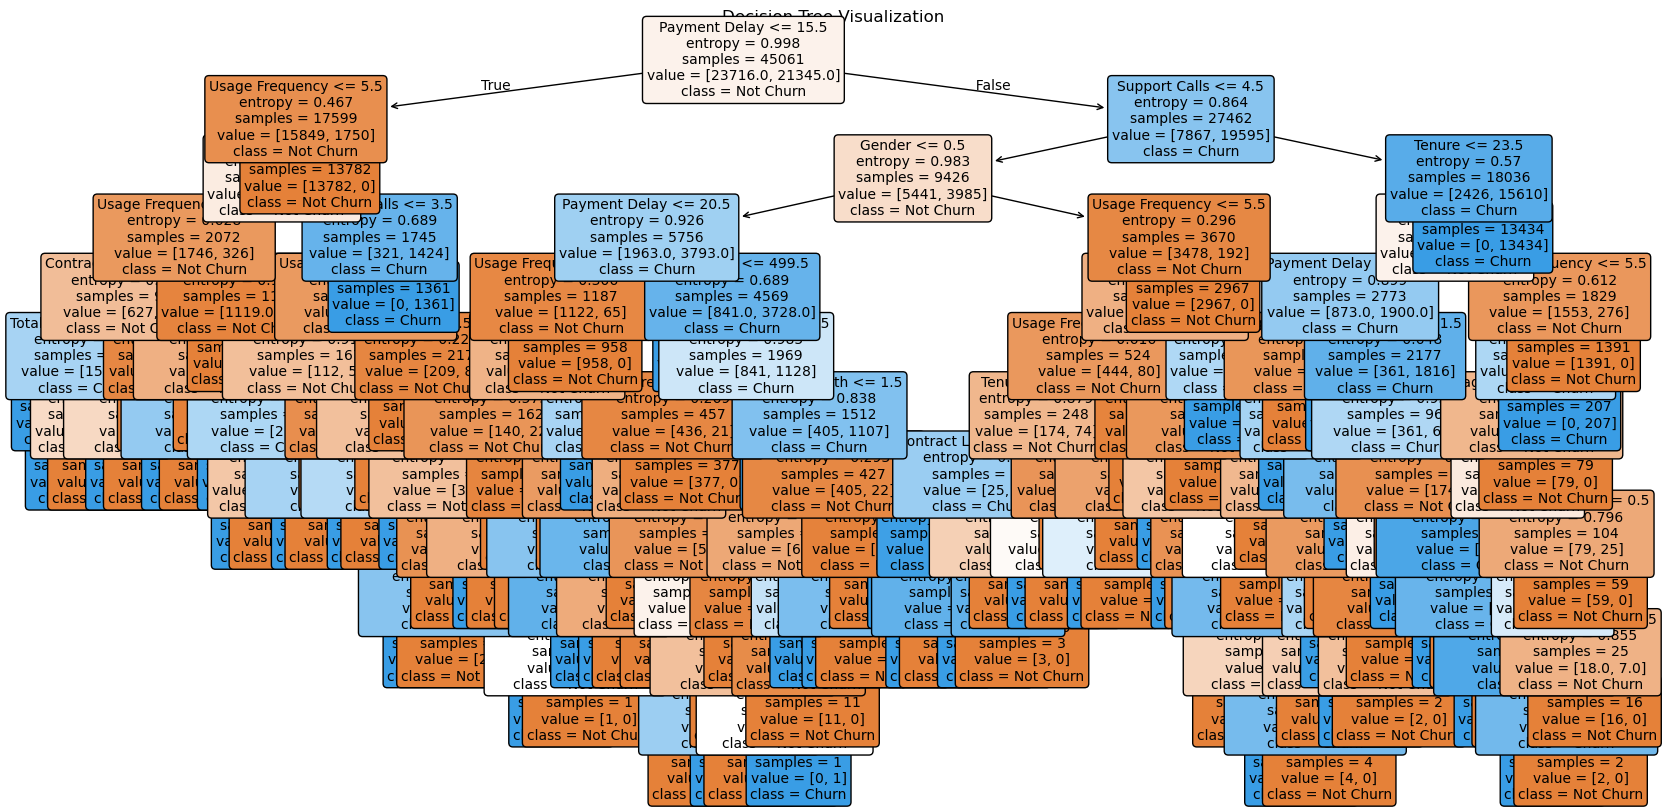

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `model` is your trained DecisionTreeClassifier
# and `X` is the DataFrame with your features

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(
    model,
    feature_names=list(X.columns),  # Names of your features
    class_names=['Not Churn', 'Churn'],  # Replace with your class names
    filled=True,  # Color nodes by class
    rounded=True,  # Round corners of nodes
    fontsize=10  # Set font size
)
plt.title("Decision Tree Visualization")  # Add a title to the plot
plt.show()